In [29]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
import minorminer.layout as mml
%matplotlib inline
import dwave.inspector
import matplotlib as mpl
import math
from datetime import datetime
from pathlib import Path  
import pandas as pd
import os
import pickle


#load the graph and the dictionary

final_qubit_dictionary = np.load("./data/dict_qbit_to_lattice.npy", allow_pickle=True).item()

Kag_graph = pickle.load(open('./data/Kag_graph.pickle', 'rb'))

#test that it works
#nx.draw(Kag_graph, final_qubit_dictionary)


# Data

Import some data

In [106]:
#file_name = "./data/J=1.0__h1,h2,k2,s=1.04,0.52,-2.0,0__04-10-23__18-08-54.npz"
file_name = "./data/J=1.0__h1,h2,k2,s=3.04,1.52,-2.0,0__04-10-23__18-09-45.npz"
def open_file(path):
    
    file=np.load(path)
    
    resp=file['resp']
    paramsarray=file['paramsarray']
    missingqs=file['missingqs']
    twochains=file['twochains']
    nodes=file['final_nodes']
    
    return resp,paramsarray,missingqs,twochains,nodes

In [107]:
resp, params, missing, twochains, nodes = open_file(file_name)

In [109]:
all_energies = np.zeros(len(resp))
for i in range(len(resp)):
    all_energies[i] = resp[i][1]
    if resp[i][2] != 1:
        print('more than once!', resp[i][2])
array_to_check = resp[np.argmin(all_energies)][0]
dict_response = {}
for j in range(len(nodes)):
    dict_response.update({nodes[j]:array_to_check[j]})

more than once! 2


In [57]:
dict_response

{8: -1,
 9: -1,
 10: 1,
 11: -1,
 12: 1,
 13: -1,
 14: -1,
 15: 1,
 528: -1,
 17: -1,
 18: -1,
 531: -1,
 532: 1,
 533: 1,
 534: 1,
 535: -1,
 20: 1,
 21: -1,
 530: 1,
 22: 1,
 19: -1,
 23: -1,
 30: -1,
 543: -1,
 541: 1,
 40: 1,
 41: 1,
 42: -1,
 43: -1,
 44: -1,
 45: -1,
 46: 1,
 47: -1,
 552: -1,
 553: 1,
 554: 1,
 555: -1,
 559: -1,
 49: -1,
 52: -1,
 50: 1,
 53: 1,
 51: 1,
 54: -1,
 55: 1,
 72: -1,
 73: -1,
 74: -1,
 75: -1,
 76: -1,
 77: -1,
 78: -1,
 79: 1,
 80: -1,
 81: 1,
 82: -1,
 83: -1,
 84: -1,
 85: -1,
 86: -1,
 87: -1,
 16: -1,
 93: 1,
 529: 1,
 104: -1,
 105: 1,
 106: -1,
 107: -1,
 108: -1,
 109: -1,
 110: 1,
 111: -1,
 112: 1,
 113: -1,
 114: -1,
 115: 1,
 116: 1,
 117: -1,
 118: -1,
 119: -1,
 136: -1,
 137: 1,
 138: -1,
 139: -1,
 140: -1,
 141: 1,
 142: 1,
 143: -1,
 144: -1,
 145: -1,
 146: -1,
 147: 1,
 148: 1,
 149: -1,
 150: -1,
 159: -1,
 556: -1,
 168: -1,
 169: -1,
 170: -1,
 171: -1,
 172: 1,
 173: 1,
 174: -1,
 175: -1,
 176: -1,
 177: -1,
 178: -1,
 179: 

In [66]:
twochains

array([[ 30, 488],
       [ 14, 472],
       [216, 342],
       [204, 350],
       [252, 343],
       [268, 351],
       [ 45, 412],
       [ 93, 404],
       [238, 511],
       [286, 471],
       [255, 535],
       [239, 543],
       [143, 541],
       [159, 533]])

In [110]:
for key in final_qubit_dictionary.keys():
    if key not in dict_response:
        print('problem', key)
        dict_response.update({key:0})

problem 151


plot this lattice and spin response

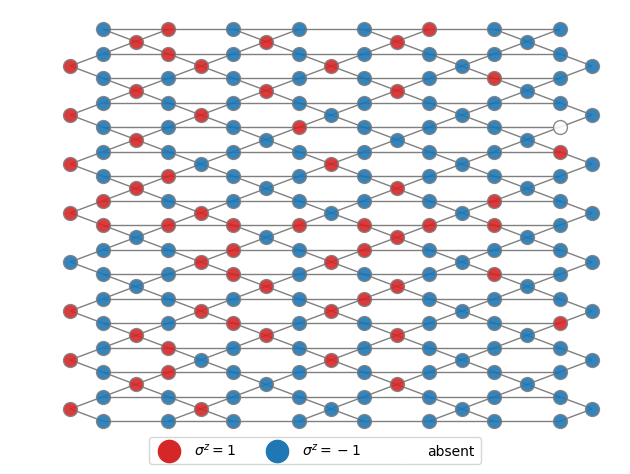

In [111]:
#plot the Kagome lattice graph with a certain response in mind

#--- 1 -- 
#make a generic response
test_array = dict_response

test_response_qubits = np.array([k for k in final_qubit_dictionary.keys()])
qubits_val = [[], [], []]
for i in range(len(final_qubit_dictionary)):
    if test_array[test_response_qubits[i]] == 1.0:
        qubits_val[0].append(test_response_qubits[i])
    if test_array[test_response_qubits[i]] == -1.0:
        qubits_val[1].append(test_response_qubits[i])
    if test_array[test_response_qubits[i]] == 0.0:
        qubits_val[2].append(test_response_qubits[i])

#draw the graph with the specific nodes in red or blue

#nx.draw(simplify_Kag_graph, final_qubit_dictionary)
# nodes
ColorLegend = {r'$\sigma^z = 1$' : "tab:red", r'$\sigma^z = -1$' : "tab:blue", r'absent' : "white"}
f = plt.figure(1)
ax = f.add_subplot(1,1,1)
for label in ColorLegend:
    ax.plot([0],[0],'o', markersize = 16, color=ColorLegend[label],label=label)
ax.plot([0], [0], 'o', markersize = 20, markerfacecolor='white', markeredgecolor='white', label='')

options = {"edgecolors": "tab:gray", "node_size": 100, "alpha": 0.9}
nx.draw_networkx_nodes(Kag_graph, final_qubit_dictionary, 
nodelist=qubits_val[0], node_color="tab:red", **options, ax=ax)
nx.draw_networkx_nodes(Kag_graph, final_qubit_dictionary, 
nodelist=qubits_val[1], node_color="tab:blue", **options, ax=ax)
nx.draw_networkx_nodes(Kag_graph, final_qubit_dictionary, 
nodelist=qubits_val[2], node_color="white", **options, ax=ax)

# edges
nx.draw_networkx_edges(Kag_graph, final_qubit_dictionary, width=1.0, alpha=0.5, ax=ax)
# Create a custom legend with colored markers

# Setting it to how it was looking before.                                                                                                              
plt.axis('off')
f.set_facecolor('w')

plt.legend(bbox_to_anchor =(0.5,-0.07),loc='lower center', ncol=3, fontsize = 10)

plt.tight_layout()
plt.axis("off")
plt.show()

do a fourier transform of this

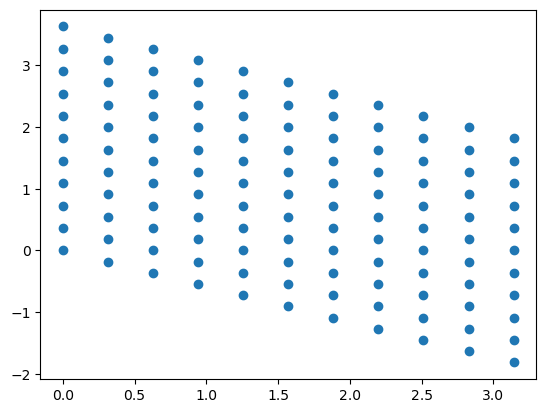

In [83]:
def momentum_grid_kagome(N, k_lims):
        # Reciprocal lattice vectors
        b1 = 2*np.pi * np.array([1, -1/np.sqrt(3)])
        b2 = 2*np.pi * np.array([0, 2/np.sqrt(3)])

        # Generate a mesh of points in the range -0.5 to 0.5 for each reciprocal lattice vector
        points1 = np.linspace(*k_lims[0], N)
        points2 = np.linspace(*k_lims[0], N)
        mesh1, mesh2 = np.meshgrid(points1, points2)

        m1 = mesh1.flatten()
        m2 = mesh2.flatten()
        kx_vals = np.zeros(N**2)
        ky_vals = np.zeros(N**2)
        for i in range(N**2):
                kx_vals[i] = m1[i]*b1[0] + m2[i]*b2[0]
                ky_vals[i] = m1[i]*b1[1] + m2[i]*b2[1]

        total_K = []
        for i in range(N**2):
                total_K.append([kx_vals[i], ky_vals[i]])
        total_K = np.array(total_K)
        kx_vals = kx_vals.reshape(N,N)
        ky_vals = ky_vals.reshape(N,N)



        return total_K, kx_vals, ky_vals

def momentum_grid(N, k_lims):
        # Reciprocal lattice vectors
        b1 = 2*np.pi * np.array([1,0])
        b2 = 2*np.pi * np.array([0, 1])

        # Generate a mesh of points in the range -0.5 to 0.5 for each reciprocal lattice vector
        points1 = np.linspace(*k_lims[0], N)
        points2 = np.linspace(*k_lims[0], N)
        mesh1, mesh2 = np.meshgrid(points1, points2)

        m1 = mesh1.flatten()
        m2 = mesh2.flatten()
        kx_vals = np.zeros(N**2)
        ky_vals = np.zeros(N**2)
        for i in range(N**2):
                kx_vals[i] = m1[i]*b1[0] + m2[i]*b2[0]
                ky_vals[i] = m1[i]*b1[1] + m2[i]*b2[1]

        total_K = []
        for i in range(N**2):
                total_K.append([kx_vals[i], ky_vals[i]])
        total_K = np.array(total_K)
        kx_vals = kx_vals.reshape(N,N)
        ky_vals = ky_vals.reshape(N,N)



        return total_K, kx_vals, ky_vals


#plot the scatter of the kx, ky points that have to be run over
k_lims = [[0,0.5],[0,0.5]]
total_K, kx_vals, ky_vals = momentum_grid_kagome(11, k_lims)
plt.scatter(kx_vals, ky_vals)


In [112]:
k_lims = [[-0.75, 0.75], [-0.75, 0.75]]
total_K, kx_vals, ky_vals = momentum_grid(21, k_lims)

structure_factor = np.zeros(len(total_K)) + 1j*np.zeros(len(total_K))
S2_spin = np.zeros(len(total_K))
test_array = dict_response

test_response_qubits = np.array([k for k in final_qubit_dictionary.keys()])

test_array = np.ones(len(final_qubit_dictionary))

for kp in range(len(total_K)):
    val = 0
    for q1 in test_response_qubits:
        for q2 in test_response_qubits:
            kpoint = total_K[kp]
            r1 = final_qubit_dictionary[q1]
            r2 = final_qubit_dictionary[q2]
            rdist = r1 - r2
            val += np.exp(1j*np.dot(kpoint, rdist))*dict_response[q1]*dict_response[q2]
    val = val/len(test_response_qubits)
    structure_factor[kp] = val
    S2_spin[kp] = abs(val)



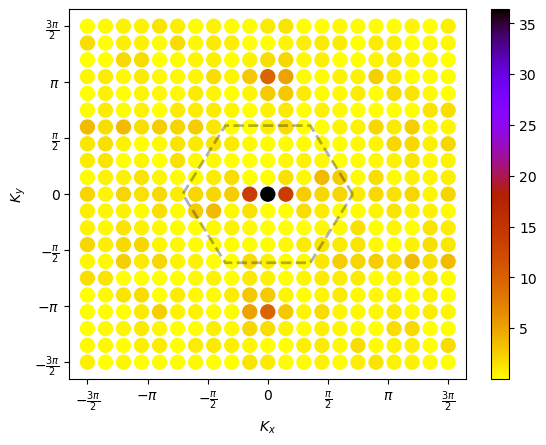

In [113]:
#norm = plt.Normalize(0,len(test_response_qubits))
from matplotlib.patches import Polygon

cmap = plt.cm.get_cmap('gnuplot_r')
plt.scatter(kx_vals, ky_vals, s=100, c=S2_spin, cmap=cmap)
plt.colorbar()
plt.xlabel(r'$K_x$')
plt.ylabel(r'$K_y$')
# Add a transparent hexagon to the plot
hexagon_sides = (np.pi/np.sqrt(2))*np.array([[1, 0], [0.5, np.sqrt(3)/2], [-0.5, np.sqrt(3)/2], 
[-1, 0], [-0.5, -np.sqrt(3)/2], [0.5, -np.sqrt(3)/2]])
hexagon = Polygon(xy=hexagon_sides, 
                  facecolor='none', edgecolor='black', linewidth=2, alpha=0.3, linestyle='--')
plt.gca().add_patch(hexagon)

#k-vect
#k_vect = np.pi * np.array([1, -1/np.sqrt(3)])
#plt.plot(k_vect[0], k_vect[1], marker="o", markersize=20, markeredgecolor="black", markerfacecolor="black")


#set ticks in units of Pi
# Set the x and y ticks to fractions of pi
if max(k_lims[0]) == 0.75:
    x_ticks = [-3*np.pi/2, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2]
    x_ticklabels = [r'$-\frac{3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$'];
elif max(k_lims[0]) == 0.5:
    x_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    x_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$'];
plt.xticks(x_ticks, x_ticklabels);
if max(k_lims[1]) == 0.75:
    y_ticks = [-3*np.pi/2, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2]
    y_ticklabels = [r'$-\frac{3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$'];
elif max(k_lims[1]) == 0.5:
    y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    y_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$'];
plt.yticks(y_ticks, y_ticklabels);
plt.show()
